In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
data = data.dropna()
print (data.info())
print (data.head(5))
print ('-'*90)
print ("Successfully imported Insurance data. Data has {} data points with {} variables each.".format(*data.shape))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
None
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
------------------------------------------------------------------------------------------


In [3]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'under-weight'
    elif bmi >= 18.5 and bmi <= 24.9:
        return 'normal-weight'
    elif bmi >= 24 and bmi <= 29.9:
        return 'over-weight'
    elif bmi > 30.0:
        return "obese"

In [4]:
def age_category(age):
    age_dict = {
        0: '0-9',
        1: '10-19',
        2: '20-29',
        3: '30-39',
        4: '40-49',
        5: '50-59',
        6: '60-69',
        7: '70-79',
        8: '80-89',
        9: '90-99',
        10: '100-200'
    }
    return age_dict[age//10]

In [5]:
data['cbmi'] = data['bmi'].apply(lambda x: "none")
data['cage'] = data['age'].apply(lambda x: "none")

In [6]:
for idx, row in data.iterrows():
    data.at[idx, 'cage'] = age_category(row['age'])
    data.at[idx, 'cbmi'] = bmi_category(row['bmi'])
    
by_age = data.groupby(by='cage').size()
print (by_age)
print ('-'*80)

by_sex = data.groupby(by='sex').size()
print (by_sex)
print ('-'*80)

by_smoker = data.groupby(by='smoker').size()
print (by_smoker)
print ('-'*80)

by_region = data.groupby(by='region').size()
print (by_region)
print ('-'*80)

by_children = data.groupby(by='children').size()
print (by_children)
print ('-'*80)

by_bmi = data.groupby(by='cbmi').size()
print (by_bmi)
print ('-'*80)

cage
10-19    137
20-29    280
30-39    257
40-49    279
50-59    271
60-69    114
dtype: int64
--------------------------------------------------------------------------------
sex
female    662
male      676
dtype: int64
--------------------------------------------------------------------------------
smoker
no     1064
yes     274
dtype: int64
--------------------------------------------------------------------------------
region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64
--------------------------------------------------------------------------------
children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64
--------------------------------------------------------------------------------
cbmi
normal-weight    222
obese            705
over-weight      380
under-weight      20
dtype: int64
--------------------------------------------------------------------------------


In [7]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
variables = ['sex','smoker','region','cage','cbmi','children']

Data distribution analysys


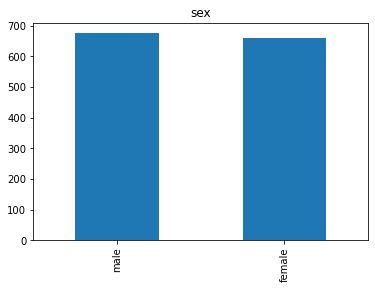

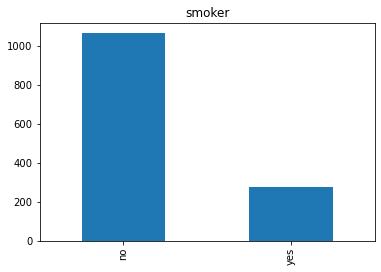

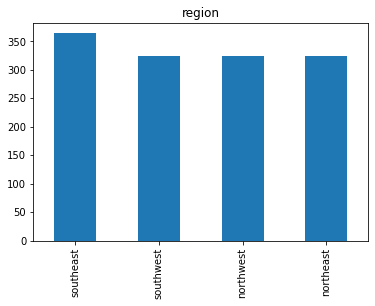

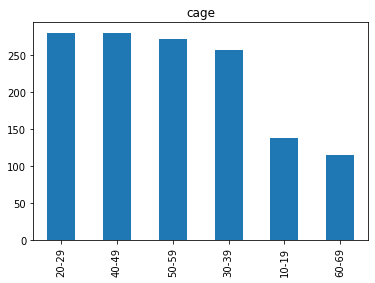

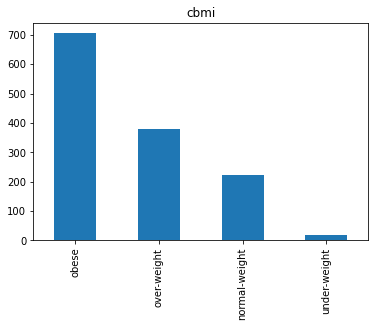

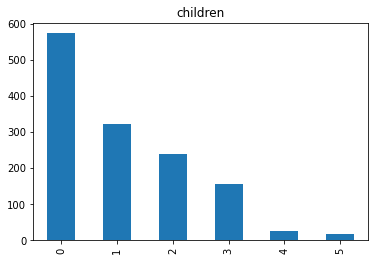

In [9]:
# data distribution analysys
print('Data distribution analysys')
for v in variables:
    data = data.sort_values(by=[v])
    data[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

Mean cost analysys:


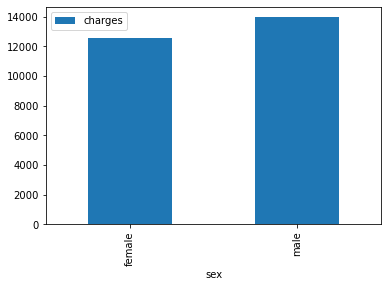

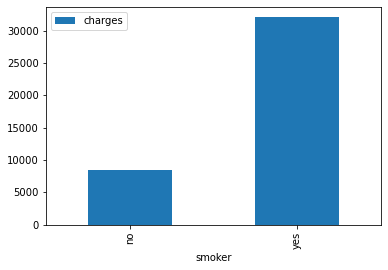

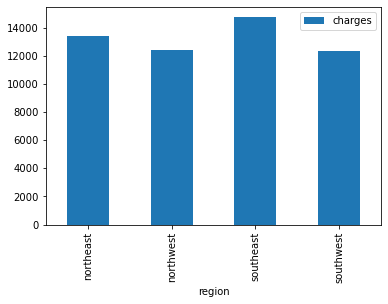

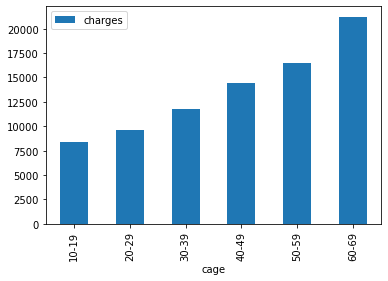

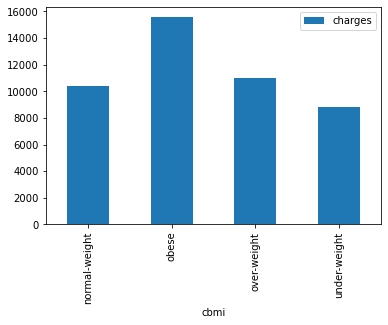

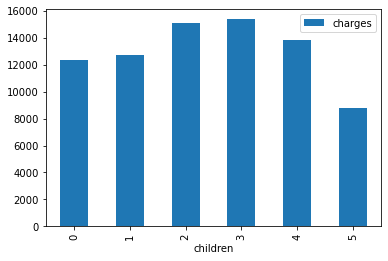

In [10]:
print('Mean cost analysys:')
for v in variables:
    group_df = data.groupby(pd.Grouper(key=v)).mean()
    group_df = group_df.sort_index()
    group_df.plot(y = ['charges'],kind = 'bar')
    plt.show()

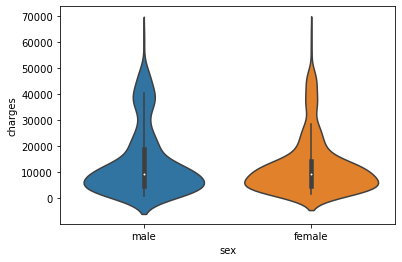

In [11]:
sns.violinplot(x='sex', y='charges',data=data)

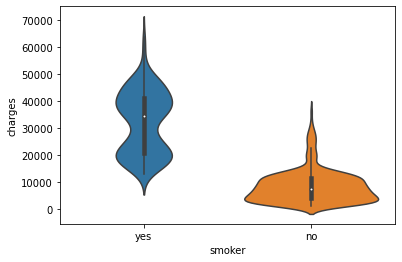

In [12]:
sns.violinplot(x='smoker', y='charges',data=data)

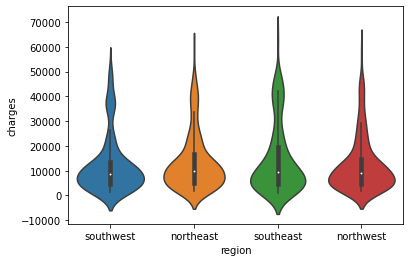

In [13]:
sns.violinplot(x='region', y='charges',data=data)

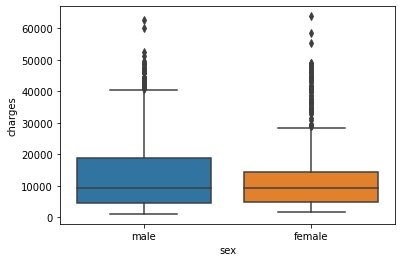

In [14]:
sns.boxplot(x='sex', y='charges',data=data)

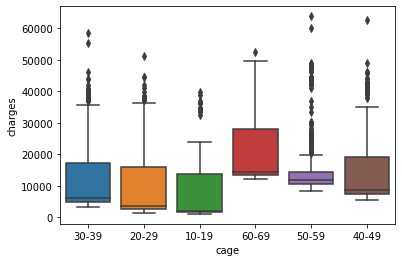

In [15]:
sns.boxplot(x='cage', y='charges',data=data)

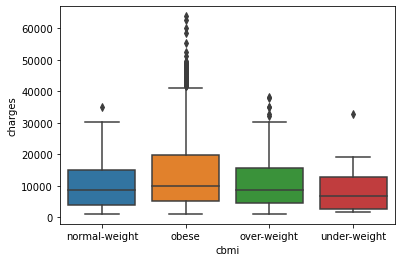

In [16]:
sns.boxplot(x='cbmi', y='charges',data=data)

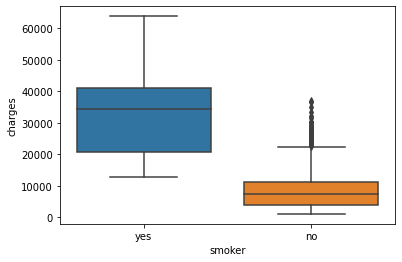

In [17]:
sns.boxplot(x='smoker', y='charges',data=data)

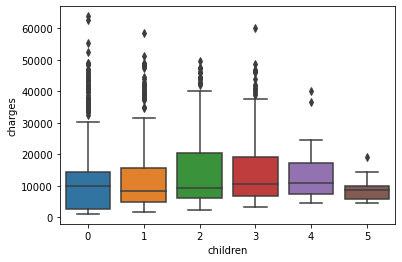

In [18]:
sns.boxplot(x='children', y='charges',data=data)

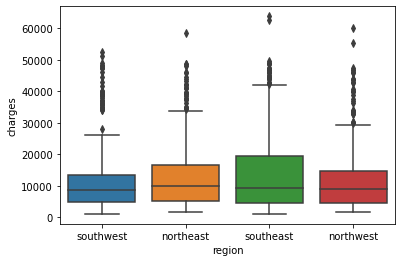

In [19]:
sns.boxplot(x='region', y='charges',data=data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


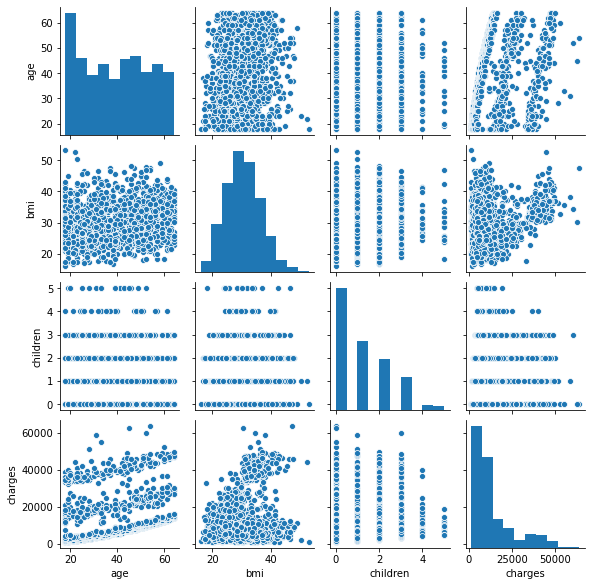

In [20]:
sns.pairplot(data, size=2)

In [24]:
import numpy as np

In [25]:
target = data['charges']
features = data.drop(['age', 'bmi', 'charges'], axis=1)
min_cost = np.min(target)
max_cost = np.max(target)
mean_cost = np.mean(target)
median_cost = np.median(target)
std_cost = np.std(target)

print (target.describe())
print ('-'*90)
# calculated statistics
print ("Statistics for Medical Insurance dataset:\n")
print ("Minimum insurance cost: ${:,.2f}".format(min_cost))
print ("Maximum insurance acost: ${:,.2f}".format(max_cost))
print ("Mean insurance cost: ${:,.2f}".format(mean_cost))
print ("Median insurance cost ${:,.2f}".format(median_cost))
print ("Standard deviation of insurance costs: ${:,.2f}".format(std_cost))

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
------------------------------------------------------------------------------------------
Statistics for Medical Insurance dataset:

Minimum insurance cost: $1,121.87
Maximum insurance acost: $63,770.43
Mean insurance cost: $13,270.42
Median insurance cost $9,382.03
Standard deviation of insurance costs: $12,105.48


In [27]:
output = pd.DataFrame(index=features.index)

for col, col_data in features.iteritems():
    if object == col_data.dtype:
        col_data = col_data.replace(['yes', 'no'], [1, 0])
        
    if object == col_data.dtype:
        col_data = pd.get_dummies(col_data, prefix = col)
    output = output.join(col_data)

features = output
print ("Processed feature columns ({} total features):\n{}".format(len(features.columns), list(features.columns)))
#print features.head(5)

Processed feature columns (18 total features):
['sex_female', 'sex_male', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'cbmi_normal-weight', 'cbmi_obese', 'cbmi_over-weight', 'cbmi_under-weight', 'cage_10-19', 'cage_20-29', 'cage_30-39', 'cage_40-49', 'cage_50-59', 'cage_60-69']


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.20, 
                                                    random_state=0)
print ("Training and testing split was successful.")

Training and testing split was successful.


In [29]:
from time import time
from sklearn.metrics import r2_score, explained_variance_score
def train_predict_model(clf, X_train, y_train, X_test, y_test):
    ''' Fits a classifier to the training data. '''
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))
    print ('#'*50)
    # Start the clock, make predictions, then stop the clock
    print ("Predictions for training data:")
    start = time()
    y_pred = clf.predict(X_train)
    end = time()
    print ("Made predictions for training data in {:.4f} seconds.".format(end - start))
    print ("R^2 score for training set: {:4f}".format(r2_score(y_train.values, y_pred)))
    print ("explained-variance score for training set: {:4f}".format(explained_variance_score(y_train.values, y_pred)))
    print ('#'*50)
    print ("Predictions for testing data:")
    start = time()
    y_pred = clf.predict(X_test)
    end = time()
    print ("Made predictions for testing data in {:.4f} seconds.".format(end - start))
    print ("R^2 score for testing set: {:4f}".format(r2_score(y_test.values, y_pred)))
    print ("explained-variance score for testing set: {:4f}".format(explained_variance_score(y_test.values, y_pred)))

In [30]:
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

clf_a = DecisionTreeRegressor(random_state=1)
clf_b = SVR()
clf_c = KNeighborsRegressor()
clf_d = NuSVR()
for clf in (clf_a, clf_b, clf_c, clf_d):
    for size in (300, 600, 900):
        train_predict_model(clf, X_train[:size], y_train[:size], X_test, y_test)
        print('-'* 80)
    print ('+'*80)

Training a DecisionTreeRegressor using a training set size of 300. . .
Trained model in 0.0311 seconds
##################################################
Predictions for training data:
Made predictions for training data in 0.0000 seconds.
R^2 score for training set: 0.969219
explained-variance score for training set: 0.969219
##################################################
Predictions for testing data:
Made predictions for testing data in 0.0000 seconds.
R^2 score for testing set: 0.759738
explained-variance score for testing set: 0.759814
--------------------------------------------------------------------------------
Training a DecisionTreeRegressor using a training set size of 600. . .
Trained model in 0.0000 seconds
##################################################
Predictions for training data:
Made predictions for training data in 0.0156 seconds.
R^2 score for training set: 0.955965
explained-variance score for training set: 0.955965
##########################################

In [31]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import make_scorer
def fit_model(X, y):
    rs = ShuffleSplit(n_splits=16, test_size=0.20, random_state=1)
    cv_sets = rs.split(X)
    reg = DecisionTreeRegressor(random_state=0)
    params = {
        'criterion': ['mse', 'friedman_mse', 'mae'],
        'splitter': ['best', 'random'],
        'max_depth': range(1,11),
    }
    scoring_fnc = make_scorer(r2_score)
    grid = GridSearchCV(estimator=reg, 
                        param_grid=params, 
                        scoring=scoring_fnc,
                        cv=cv_sets)
    grid = grid.fit(features, target)
    return grid.best_estimator_

best_reg = fit_model(X_train, y_train)
print ('Model Parameters:')
print ("Parameter 'criterion' is {} for the optimal model.".format(best_reg.get_params()['criterion']))
print ("Parameter 'splitter' is {} for the optimal model.".format(best_reg.get_params()['splitter']))
print ("Parameter 'max_depth' is {} for the optimal model.".format(best_reg.get_params()['max_depth']))
train_predict_model(best_reg, X_train, y_train, X_test, y_test)


Model Parameters:
Parameter 'criterion' is mae for the optimal model.
Parameter 'splitter' is best for the optimal model.
Parameter 'max_depth' is 6 for the optimal model.
Training a DecisionTreeRegressor using a training set size of 1070. . .
Trained model in 0.0560 seconds
##################################################
Predictions for training data:
Made predictions for training data in 0.0000 seconds.
R^2 score for training set: 0.860868
explained-variance score for training set: 0.869400
##################################################
Predictions for testing data:
Made predictions for testing data in 0.0000 seconds.
R^2 score for testing set: 0.849415
explained-variance score for testing set: 0.857397


In [32]:
client_data = [
    [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 3, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
 ]
#0      19  female  27.900         0    yes  southwest  16884.92400
#1      18    male  33.770         1     no  southeast   1725.55230
#1313   19  female  34.700         2    yes  southwest  36397.57600
#1314   30  female  23.655         3    yes  northwest  18765.87545
#15     19    male  24.600         1     no  southwest   1837.23700
#29     31    male  36.300         2    yes  southwest  38711.00000

#'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
#      age  sex_female  sex_male    bmi  children  smoker  region_northeast  \
best_reg.predict(client_data)

array([17081.08   ,  2219.4451 , 36149.4835 , 19361.9988 ,  2219.4451 ,
       38728.67755])